In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import PandAnaTools.Fit.utils
from PandAnaTools.Fit import LocalTemplateFit, GlobalTemplateFit
import scipy.optimize

In [6]:
phase_space = (2,2)
nbins = 20
signal, bkgd0, bkgd1, bins = PandAnaTools.Fit.utils.fake_templates(nbins, shape=phase_space)
total = signal + bkgd0 + bkgd1

cov, inv = PandAnaTools.Fit.utils.cov_inv(PandAnaTools.Fit.utils.poisson_multiverse(total.flatten(), nuniverses=100))

fit = GlobalTemplateFit(cov, (signal, bkgd0, bkgd1))

mock_scales = np.ones((3,*phase_space))
mock_scales[0] = np.linspace(1, 2, np.prod(phase_space)).reshape(mock_scales[0].shape)
mock_scales[1] = (np.linspace(0.9, 1.2, np.prod(phase_space)))[::-1].reshape(mock_scales[1].shape)

mock_data = np.random.poisson(fit.U(mock_scales.flatten()))

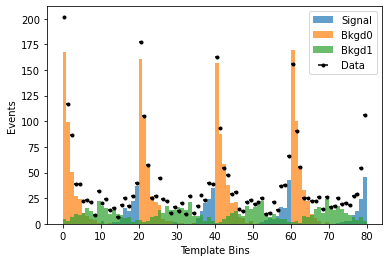

In [7]:
PandAnaTools.Fit.utils.plot_templates((signal.flatten(), 
                                       bkgd0.flatten(),
                                       bkgd1.flatten()),
                                      ('Signal', 
                                       'Bkgd0', 
                                       'Bkgd1'), 
                                      np.linspace(0, len(signal.flatten()), len(signal.flatten())+1),
                                      data=mock_data)

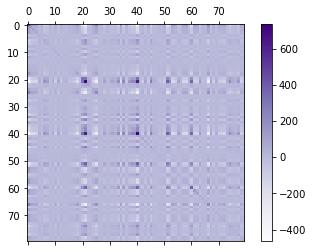

In [8]:
PandAnaTools.Fit.utils.plot_mat(cov)

In [9]:
fit.minimize(total.flatten())

     fun: 7.87083572293298e-08
    k(V): 11144.894434502718
 message: ['Maximum number of iteration reached']
    nfev: 24016
    nhev: 0
     nit: 1000
    njev: 77
  status: 0
 success: True
       x: array([1.        , 1.00000068, 1.00000009, 1.00000007, 1.00000004,
       0.99999997, 1.00000001, 0.99999993, 0.99999987, 0.99999984,
       1.00000004, 1.00000011])